# Plots of labeled, regridded data

In [3]:
import os
import xarray as xr
import xarray.plot as xplt
import pandas as pd
import numpy as np
import pygrib
import netCDF4
import scipy
import pickle
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import warnings
warnings.filterwarnings('ignore')

DATA_DIR="/root/data_downloads"
era5_multi_level_dir=f"{DATA_DIR}/era5/multi"
era5_single_level_dir=f"{DATA_DIR}/era5/single"
LABELS_DIR=f"{DATA_DIR}/era5_labeled_regridded"
%alias mkdatadir mkdir -p %l
print("done")

done


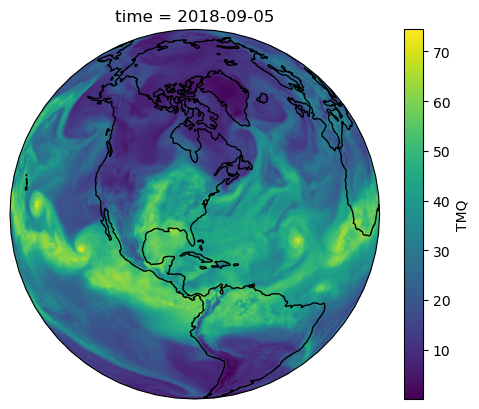

In [7]:
filename = "2018-09-05.nc"
ds = xr.open_dataset(f"{LABELS_DIR}/{filename}")
times = ds["time"]
ds["time"]=pd.to_datetime(times, unit='h', origin='1900-01-01 00:00:00.0')

# ds = ds.reindex(lat=list(reversed(ds.lat)))
# ds = ds.sortby("lon")

# ds.TMQ
# fig, axs = plt.subplots(ncols=2, nrows=1)

p = ds["TMQ"].isel(time=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.coastlines()
# tmq.axes.gridlines()
plt.draw()

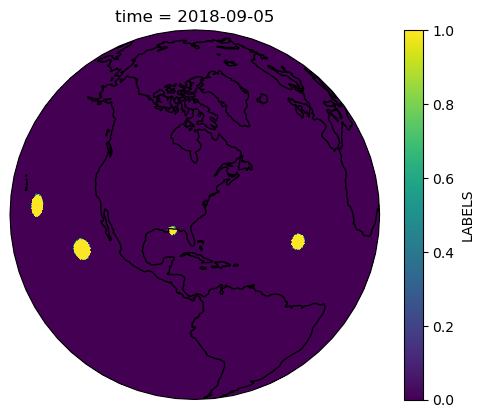

In [8]:
p = ds["LABELS"].isel(time=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"),
    transform=ccrs.PlateCarree(),
)
p.axes.coastlines()
# tmq.axes.gridlines()
plt.draw()
ds.close()